<a href="https://colab.research.google.com/github/ai-tanzil811/Assignment/blob/main/heartDiseaseDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automated Heart Disease Prediction using Explainable AI (XAI)

## Project Overview

**Course:** Machine Learning / Data Science Capstone  
0112230028

### Abstract
This project aims to develop a robust and interpretable machine learning model for predicting heart disease using clinical patient data. Leveraging an XGBoost classifier, the methodology incorporates advanced preprocessing via scikit-learn pipelines, hyperparameter optimization using Optuna for superior performance, and model explainability through SHAP (SHapley Additive exPlanations) values.

### Keywords
Heart Disease Prediction, Machine Learning, XGBoost, Optuna, Hyperparameter Tuning, SHAP, Explainable AI (XAI), Classification, Healthcare AI

### Methodology Overview
1. **Data Acquisition:** Download Cleveland Heart Disease dataset from Kaggle
2. **Data Preprocessing:** Robust pipelines for numerical and categorical features
3. **Hyperparameter Optimization:** Optuna with cross-validation for optimal XGBoost parameters
4. **Model Training & Evaluation:** Comprehensive performance assessment
5. **Model Interpretability:** SHAP analysis for global and local feature importance

In [ ]:
print("--- PROJECT: Automated Heart Disease Prediction with XAI ---")
print("\nIntroduction:")
print("Heart disease remains a leading cause of morbidity and mortality worldwide. Early and accurate")
print("prediction can significantly improve patient outcomes through timely intervention and lifestyle")
print("modifications. This project focuses on building a predictive model that not only achieves high")
print("accuracy but also offers transparency into its decision-making process.")

print("\n--- Starting Project Execution ---")

--- PROJECT: Automated Heart Disease Prediction with XAI ---

Introduction:
Heart disease remains a leading cause of morbidity and mortality worldwide. Early and accurate
prediction can significantly improve patient outcomes through timely intervention and lifestyle
modifications. This project focuses on building a predictive model that not only achieves high
accuracy but also offers transparency into its decision-making process.

--- Starting Project Execution ---


## Part 1: Environment Setup and Data Acquisition

### Installing Required Libraries
We'll install the necessary libraries for machine learning, hyperparameter optimization, and model interpretability.

In [ ]:
print("\n--- Part 1: Setting up environment and downloading data ---")

print("Installing required libraries (XGBoost, Optuna, SHAP)...")
!pip install xgboost optuna shap scikit-learn matplotlib seaborn -q
print("Libraries installed.")


--- Part 1: Setting up environment and downloading data ---
Installing required libraries (XGBoost, Optuna, SHAP)...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 9.5 MB/s eta 0:00:00
Libraries installed.


### Import Libraries
Importing all necessary libraries for data processing, machine learning, and visualization.

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import optuna
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import os

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from collections import Counter
import joblib

print("All libraries imported successfully.")

All libraries imported successfully.


### Kaggle API Setup and Dataset Download
Setting up Kaggle API credentials and downloading the Cleveland Heart Disease dataset.

In [ ]:
print("\nPlease upload your kaggle.json file (ensuring it's named 'kaggle.json'):")
try:
    uploaded = files.upload()
    if 'kaggle.json' in uploaded:
        print("Kaggle API key uploaded successfully.")
        !mkdir -p ~/.kaggle
        !cp kaggle.json ~/.kaggle/
        !chmod 600 ~/.kaggle/kaggle.json
        print("Kaggle API configured.")
    else:
        raise KeyError("File not named kaggle.json or upload cancelled.")
except Exception as e:
    print(f"File upload failed or was cancelled: {e}. Please try again.")
    exit()

dataset_name = "ritwikb3/heart-disease-cleveland"
zip_file_name = "heart-disease-cleveland.zip"
csv_file_name = 'Heart_disease_cleveland_new.csv'

print(f"Downloading dataset '{dataset_name}'...")
!kaggle datasets download -d {dataset_name} -q
print(f"Unzipping '{zip_file_name}'...")
!unzip -o {zip_file_name} -d .
print(f"Checking for '{csv_file_name}': {os.path.exists(csv_file_name)}")

print("\n--- Data download and extraction complete ---\n")


Please upload your kaggle.json file (ensuring it's named 'kaggle.json'):


Saving kaggle.json to kaggle.json
Kaggle API key uploaded successfully.
Kaggle API configured.
Dataset URL: https://www.kaggle.com/datasets/ritwikb3/heart-disease-cleveland
License(s): CC-BY-SA-4.0
Unzipping 'heart-disease-cleveland.zip'...
Archive:  heart-disease-cleveland.zip
  inflating: ./Heart_disease_cleveland_new.csv  
Checking for 'Heart_disease_cleveland_new.csv': True

--- Data download and extraction complete ---



## Part 2: Data Loading and Exploratory Data Analysis

### Dataset Overview
Loading the dataset and performing initial exploration to understand the data structure, missing values, and target distribution.

In [ ]:
print("--- Part 2: Loading and Initial Data Exploration ---")

try:
    df = pd.read_csv(csv_file_name)
    print(f"Dataset '{csv_file_name}' loaded successfully.")
except FileNotFoundError:
    print(f"Error: Dataset '{csv_file_name}' not found. Please ensure it was unzipped correctly.")
    exit()

print("\n--- Dataset Head (First 5 rows) ---")
print(df.head())

print("\n--- Dataset Info (Column types and non-null counts) ---")
df.info()

print("\n--- Dataset Description (Statistical Summary) ---")
print(df.describe())

--- Part 2: Loading and Initial Data Exploration ---
Dataset 'Heart_disease_cleveland_new.csv' loaded successfully.

--- Dataset Head (First 5 rows) ---
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  

--- Dataset Info (Column types and non-null counts) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    ------------

### Missing Values Analysis and Feature Definition
Checking for missing values and defining numerical and categorical features for preprocessing.

In [ ]:
print("\n--- Missing Values Before Preprocessing ---")
missing_values = df.isnull().sum()
missing_values_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_values, 'Percentage': missing_values_percent})
print(missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False))
if missing_df['Missing Count'].sum() == 0:
    print("No missing values found in the dataset.")

X = df.drop('target', axis=1)
y = df['target']

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

missing_features = [f for f in categorical_features + numerical_features if f not in X.columns]
if missing_features:
    print(f"\nError: The following defined features are missing from the dataset: {missing_features}")
    exit()

print(f"\nDataset prepared with {X.shape[0]} rows and {X.shape[1]} features.")
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")


--- Missing Values Before Preprocessing ---
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []
No missing values found in the dataset.

Dataset prepared with 303 rows and 13 features.
Numerical features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


### Target Variable Analysis and Class Balance
Analyzing the distribution of the target variable to understand class balance.

In [ ]:
print("\n--- Target Variable Distribution ---")
print(y.value_counts())
print(f"Percentage of 'Heart Disease' (1): {y.value_counts(normalize=True)[1]*100:.2f}%")
print(f"Percentage of 'No Heart Disease' (0): {y.value_counts(normalize=True)[0]*100:.2f}%")
if y.value_counts(normalize=True)[1] < 0.4 or y.value_counts(normalize=True)[0] < 0.4:
    print("\nWARNING: The target variable appears to be imbalanced. This will be addressed with Stratified K-Fold Cross-Validation.")


--- Target Variable Distribution ---
target
0    164
1    139
Name: count, dtype: int64
Percentage of 'Heart Disease' (1): 45.87%
Percentage of 'No Heart Disease' (0): 54.13%


### Data Visualization
Creating visualizations to better understand feature distributions and relationships with the target variable.


--- Part 2.1: Data Visualization ---


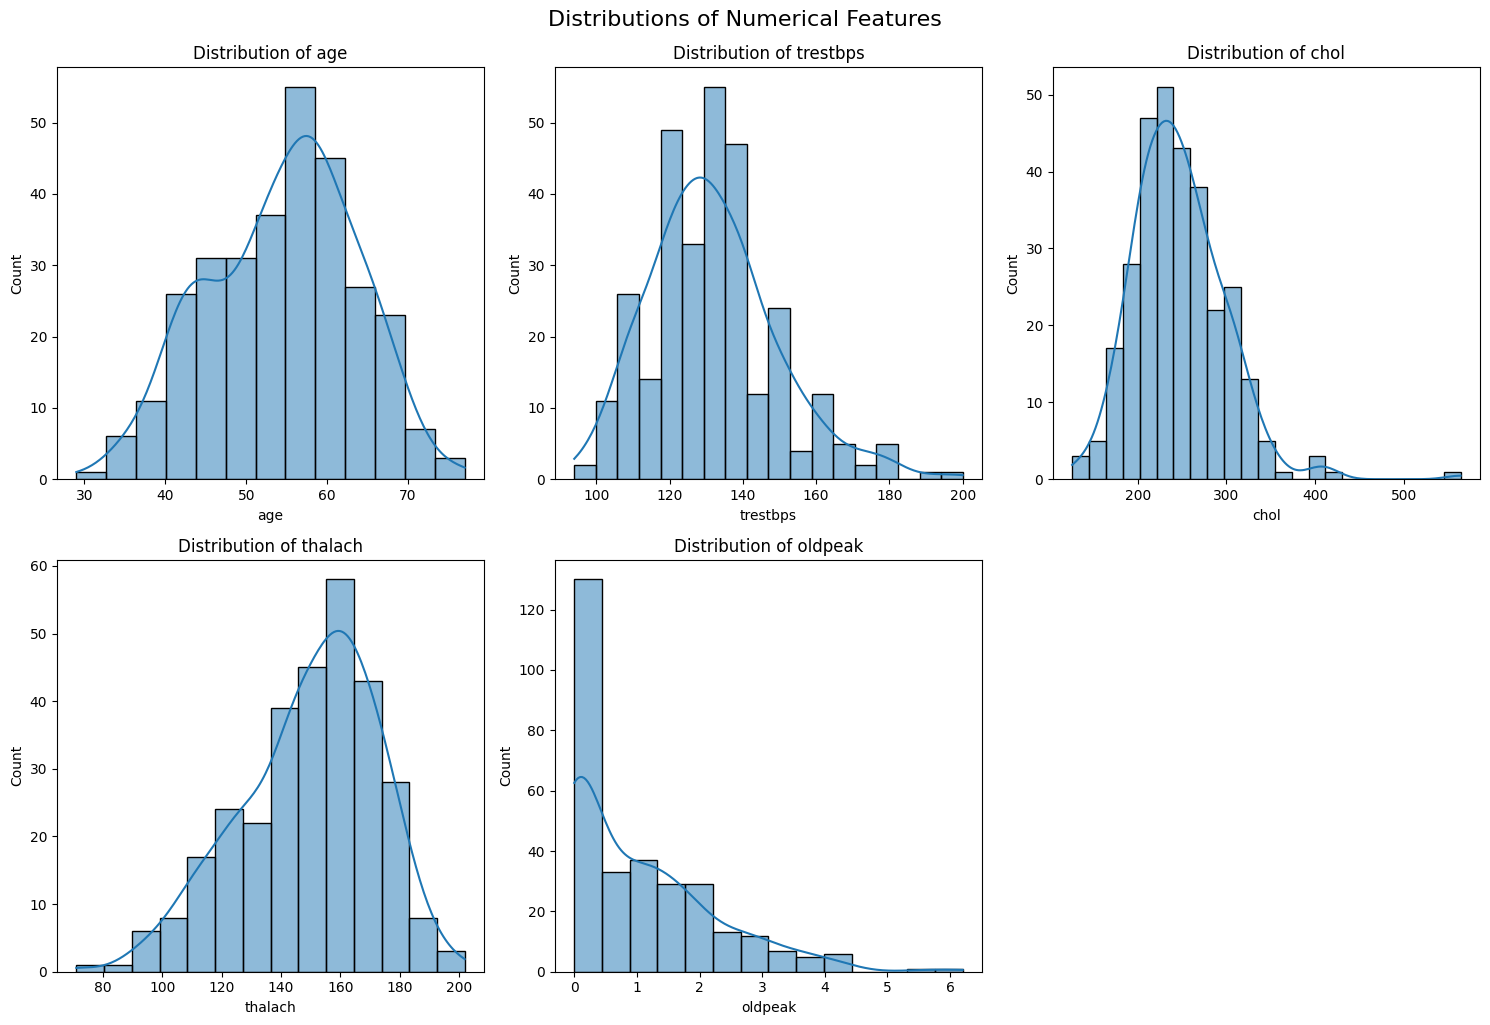

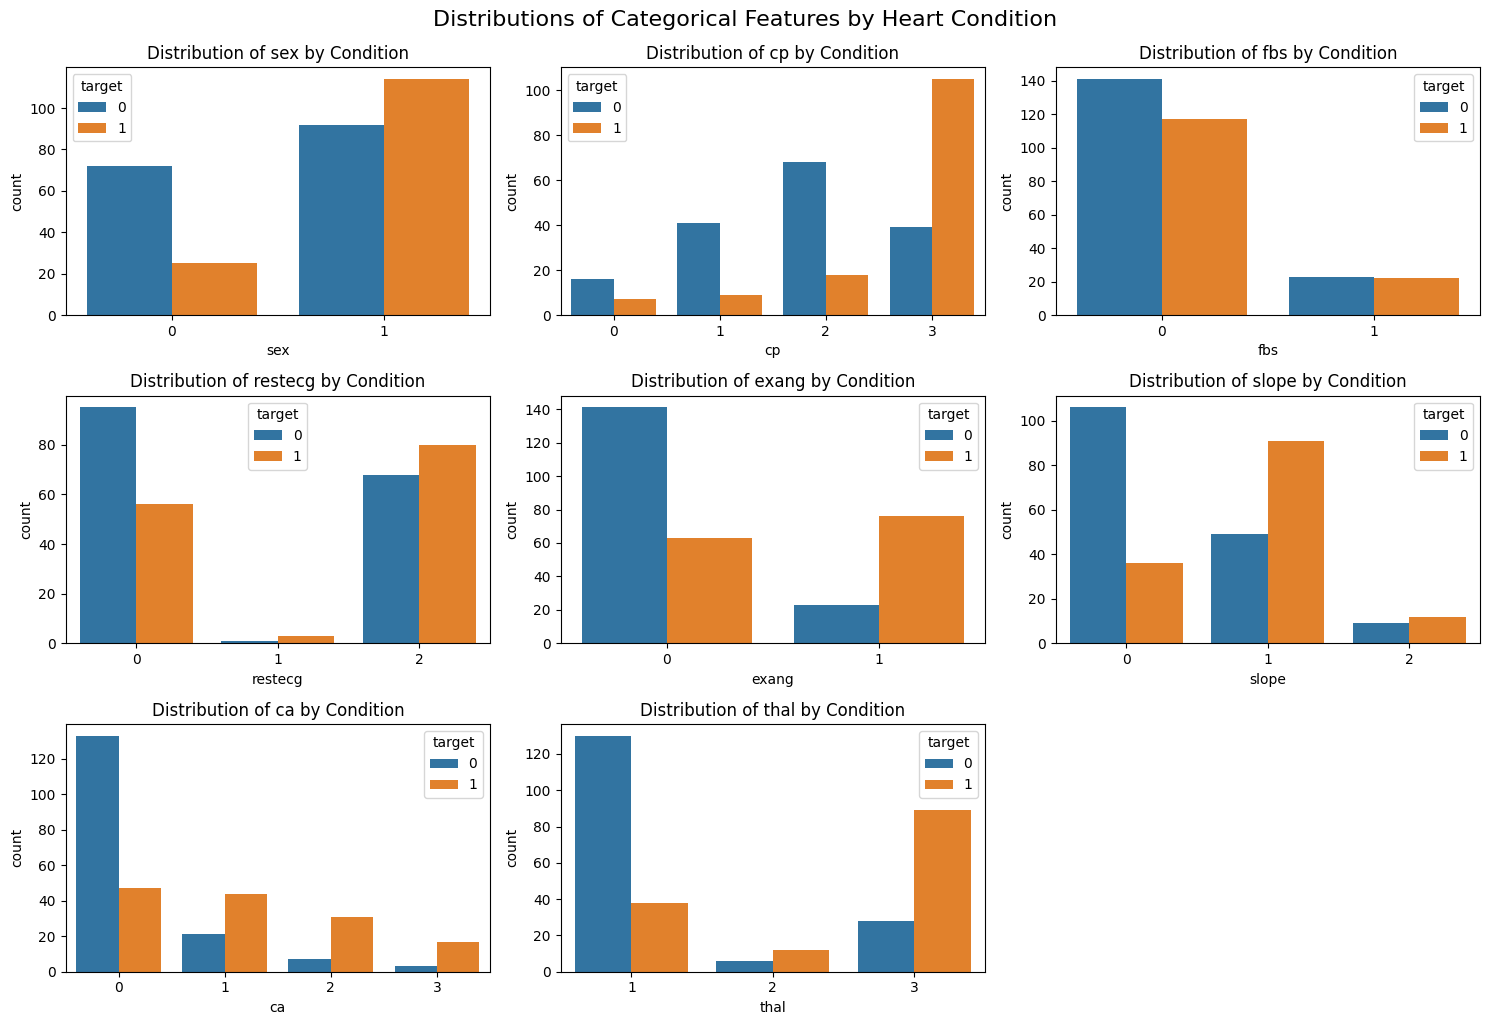

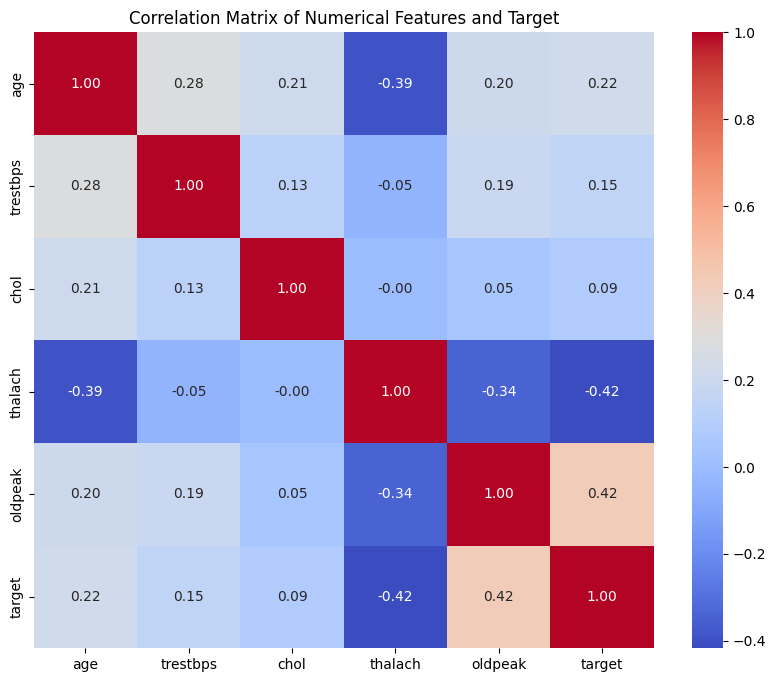


--- Initial data exploration and visualization complete ---



In [ ]:
print("\n--- Part 2.1: Data Visualization ---")

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.suptitle('Distributions of Numerical Features', y=1.02, fontsize=16)
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, hue='target', data=df)
    plt.title(f'Distribution of {col} by Condition')
plt.tight_layout()
plt.suptitle('Distributions of Categorical Features by Heart Condition', y=1.02, fontsize=16)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features + ['target']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Target')
plt.show()

print("\n--- Initial data exploration and visualization complete ---\n")

## Part 3: Data Preprocessing Pipeline

### Building Robust Preprocessing Pipeline
Creating separate pipelines for numerical and categorical features, then combining them using ColumnTransformer.

In [ ]:
print("--- Part 3: Building the preprocessing pipeline ---")

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

print("Preprocessing pipeline created successfully. It includes imputation and scaling/encoding for robustness.\n")

--- Part 3: Building the preprocessing pipeline ---
Preprocessing pipeline created successfully. It includes imputation and scaling/encoding for robustness.



## Part 4: Hyperparameter Optimization with Optuna

### Train-Test Split and Cross-Validation Setup
Splitting data and setting up cross-validation strategy for hyperparameter tuning.

In [ ]:
print("--- Part 4: Finding the best model parameters with Optuna and Cross-Validation ---")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples, {y_train.value_counts(normalize=True)[1]*100:.2f}% positive")
print(f"Test set size: {X_test.shape[0]} samples, {y_test.value_counts(normalize=True)[1]*100:.2f}% positive")

--- Part 4: Finding the best model parameters with Optuna and Cross-Validation ---
Training set size: 242 samples, 45.87% positive
Test set size: 61 samples, 45.90% positive


### Optuna Objective Function
Defining the objective function for hyperparameter optimization using cross-validation.

In [ ]:
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=50),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 1.0, log=True),
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'use_label_encoder': False,
        'n_jobs': -1,
        'random_state': 42
    }

    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', xgb.XGBClassifier(**param))
    ])

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        model.fit(X_train_fold, y_train_fold)
        scores.append(accuracy_score(y_val_fold, model.predict(X_val_fold)))

    return np.mean(scores)

### Running Optuna Optimization
Executing hyperparameter optimization and visualizing the results.

In [ ]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
print("Starting Optuna optimization (this may take up to 10 minutes)...")
study.optimize(objective, n_trials=75, timeout=900)

print("\nOptuna study complete.")
print(f"Best cross-validated accuracy: {study.best_value:.4f}")
print("Best parameters found by Optuna:", study.best_params)

print("\n--- Optuna Optimization History Plot ---")
try:
    fig_hist = optuna.visualization.plot_optimization_history(study)
    fig_hist.show()
    fig_slice = optuna.visualization.plot_slice(study)
    fig_slice.show()
    print("Optimization history plots displayed.")
except ImportError:
    print("Optuna visualization library not found. Please install plotly to view plots.")
    print("Run: !pip install plotly -q")

print("\n")

Starting Optuna optimization (this may take up to 10 minutes)...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:47:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:47:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:47:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:47:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:47:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Optuna study complete.
Best cross-validated accuracy: 0.8182
Best parameters found by Optuna: {'n_estimators': 150, 'max_depth': 8, 'learning_rate': 0.062413273434479825, 'subsample': 0.6252954648961686, 'colsample_bytree': 0.8447530427342683, 'gamma': 0.9870490564739477, 'reg_alpha': 0.35448931183111315, 'reg_lambda': 0.06288427289912138}

--- Optuna Optimization History Plot ---


Optimization history plots displayed.




## Part 5: Final Model Training and Evaluation

### Training Final Model
Training the optimized model on the full training set and evaluating on the test set.

In [ ]:
print("--- Part 5: Training the Final Model and Comprehensive Evaluation ---")

print("Training the final model on the entire training set with best parameters...")
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(**study.best_params, use_label_encoder=False, eval_metric='logloss', random_state=42))
])

final_pipeline.fit(X_train, y_train)
print("Final model training complete.")

y_pred = final_pipeline.predict(X_test)
y_pred_proba = final_pipeline.predict_proba(X_test)[:, 1]

--- Part 5: Training the Final Model and Comprehensive Evaluation ---
Training the final model on the entire training set with best parameters...
Final model training complete.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[19:48:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




### Performance Metrics
Calculating and displaying comprehensive performance metrics.

In [ ]:
print("\n--- Model Performance on Test Set ---")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Heart Disease']))


--- Model Performance on Test Set ---
Accuracy:  0.9016
Precision: 0.8667
Recall:    0.9286
F1-Score:  0.8966
ROC AUC:   0.9524

--- Classification Report ---
               precision    recall  f1-score   support

   No Disease       0.94      0.88      0.91        33
Heart Disease       0.87      0.93      0.90        28

     accuracy                           0.90        61
    macro avg       0.90      0.90      0.90        61
 weighted avg       0.90      0.90      0.90        61



### Visualization of Results
Creating confusion matrix and ROC curve for visual evaluation of model performance.


--- Confusion Matrix ---


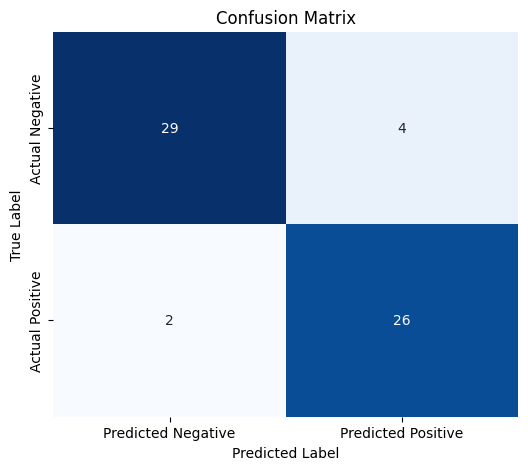


--- ROC Curve ---


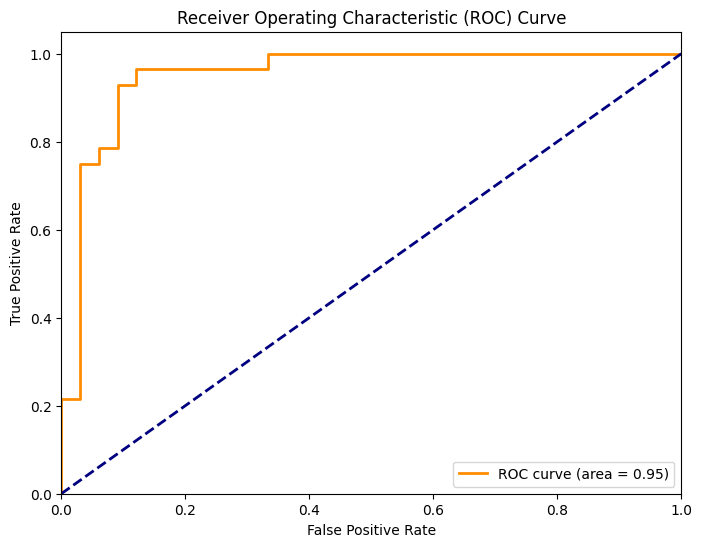


--- Model evaluation complete ---



In [ ]:
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\n--- ROC Curve ---")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("\n--- Model evaluation complete ---\n")

## Part 6: Model Interpretability with SHAP

### Explainable AI (XAI) Analysis
Using SHAP values to understand model predictions and feature importance for interpretability.

In [ ]:
print("--- Part 6: Explaining the Model's Predictions with SHAP (Explainable AI - XAI) ---")
print("SHAP values provide insights into how each feature contributes to the model's output.")
print("This may take a moment to compute SHAP values...")

try:
    shap.initjs()

    classifier = final_pipeline.named_steps['classifier']
    preprocessor_transformer = final_pipeline.named_steps['preprocessor']

    X_test_transformed = preprocessor_transformer.transform(X_test)

    num_features_out = numerical_features
    cat_feature_names_out = preprocessor_transformer.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

    feature_names_transformed = list(num_features_out) + list(cat_feature_names_out)
    X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names_transformed)

    explainer = shap.TreeExplainer(classifier)
    shap_values = explainer.shap_values(X_test_transformed_df)

    print("SHAP values computed successfully.")

except Exception as e:
    print(f"\nError during SHAP setup: {e}")
    print("Please ensure shap library is correctly installed and data is properly transformed.")

--- Part 6: Explaining the Model's Predictions with SHAP (Explainable AI - XAI) ---
SHAP values provide insights into how each feature contributes to the model's output.
This may take a moment to compute SHAP values...


SHAP values computed successfully.


### Global Feature Importance
Displaying global feature importance using SHAP summary plots.


--- Global Feature Importance (SHAP Summary Plot - Bar) ---
This plot shows the overall impact of each feature on the model's output across the entire dataset.


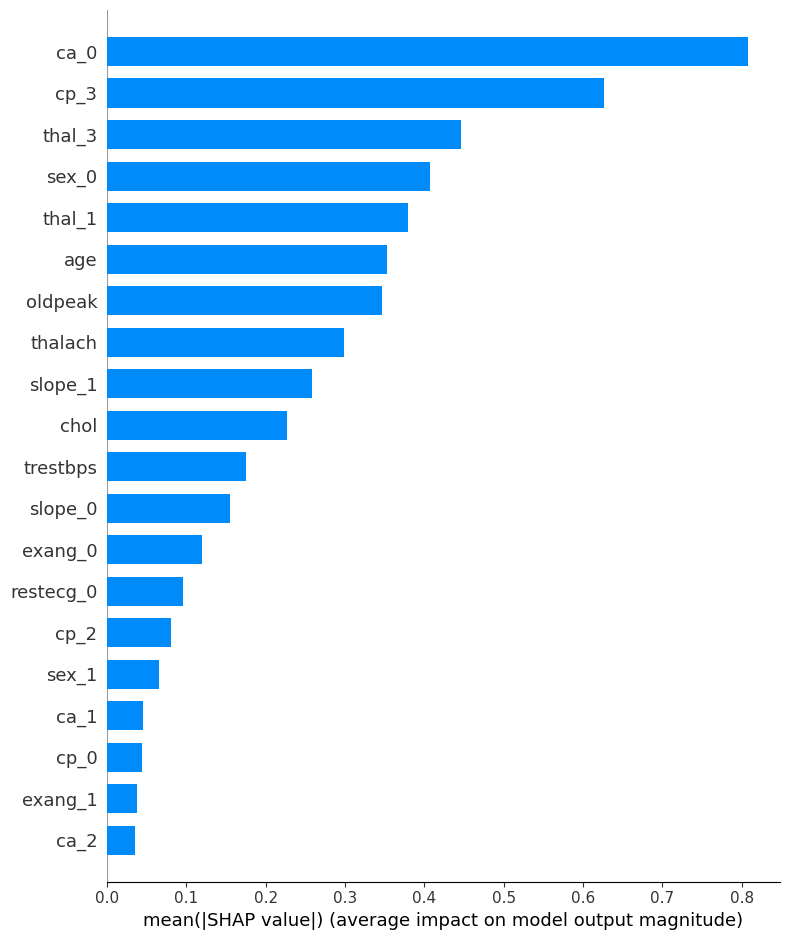


--- Detailed Global Feature Importance (SHAP Summary Plot - Beeswarm) ---
The beeswarm plot provides more detail: the spread of SHAP values indicates variability,
and color indicates feature value (red for higher, blue for lower).


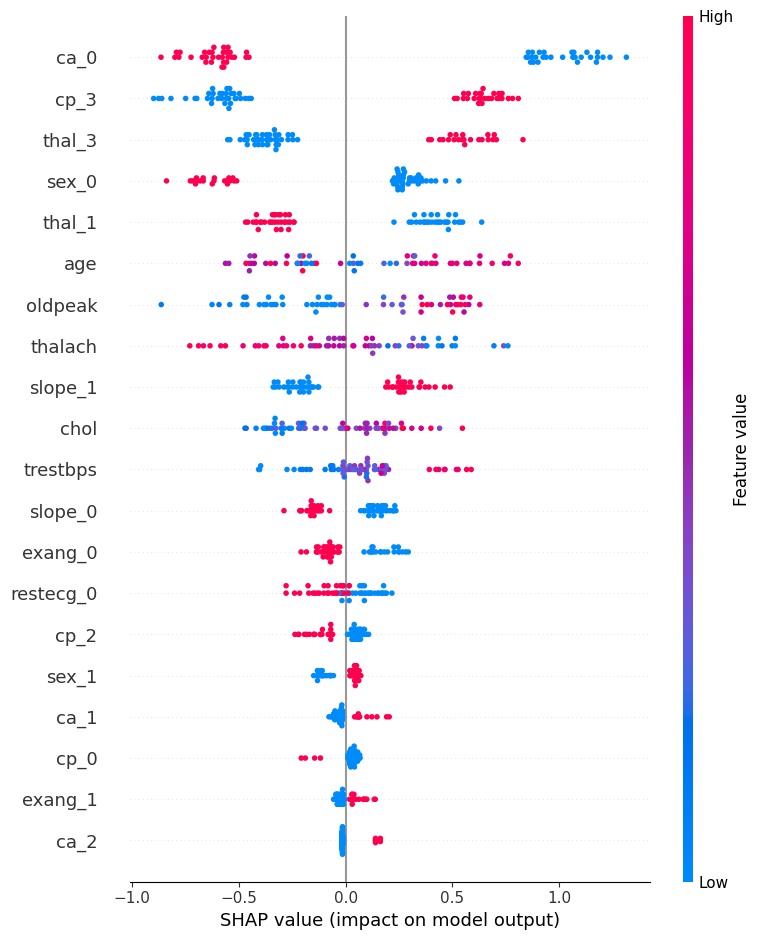

In [ ]:
try:
    print("\n--- Global Feature Importance (SHAP Summary Plot - Bar) ---")
    print("This plot shows the overall impact of each feature on the model's output across the entire dataset.")
    shap.summary_plot(shap_values, X_test_transformed_df, plot_type="bar", show=True)
    plt.show()

    print("\n--- Detailed Global Feature Importance (SHAP Summary Plot - Beeswarm) ---")
    print("The beeswarm plot provides more detail: the spread of SHAP values indicates variability,")
    print("and color indicates feature value (red for higher, blue for lower).")
    shap.summary_plot(shap_values, X_test_transformed_df, show=True)
    plt.show()

except Exception as e:
    print(f"Error creating SHAP summary plots: {e}")

### Local Explanation Example
Showing how SHAP explains individual predictions with force plots.


--- Local Explanation: SHAP Force Plot for a Specific Prediction ---
This plot explains why a single patient received a particular prediction. Green values push
the prediction lower (towards no disease), red values push it higher (towards disease).

Explaining prediction for sample 0 (Actual: 0, Predicted: 0):


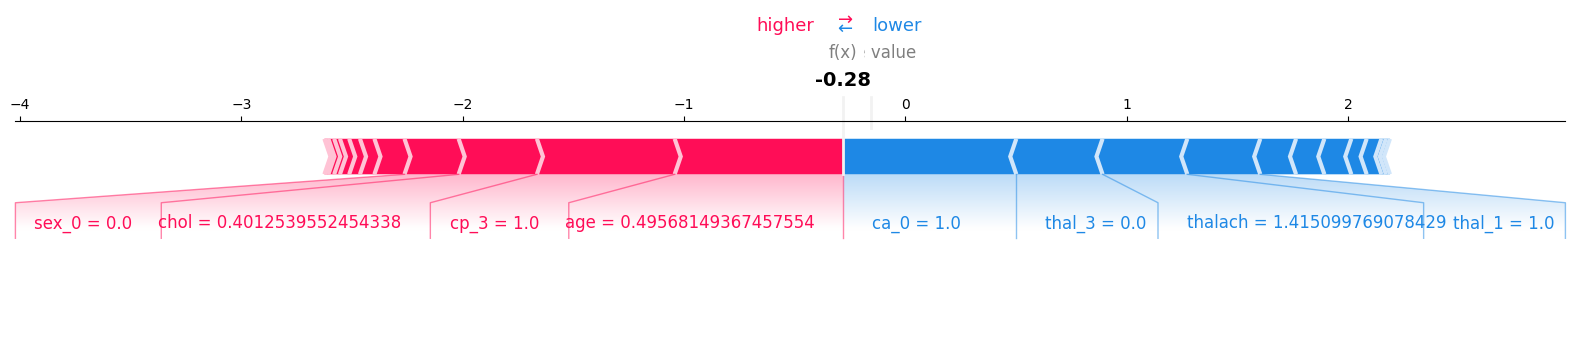


--- SHAP explanation plots displayed ---



In [ ]:
try:
    print("\n--- Local Explanation: SHAP Force Plot for a Specific Prediction ---")
    print("This plot explains why a single patient received a particular prediction. Green values push")
    print("the prediction lower (towards no disease), red values push it higher (towards disease).")

    sample_idx_to_explain = 0
    print(f"\nExplaining prediction for sample {sample_idx_to_explain} (Actual: {y_test.iloc[sample_idx_to_explain]}, Predicted: {y_pred[sample_idx_to_explain]}):")
    shap.force_plot(
        explainer.expected_value,
        shap_values[sample_idx_to_explain,:],
        X_test_transformed_df.iloc[sample_idx_to_explain,:],
        matplotlib=True,
        show=True
    )
    plt.show()

    print("\n--- SHAP explanation plots displayed ---\n")

except Exception as e:
    print(f"Error creating SHAP force plot: {e}")

## Part 7: Conclusion and Future Work

### Project Summary
Summary of achievements, limitations, and recommendations for future improvements.

In [ ]:
print("--- Part 7: Conclusion and Future Work ---")

print("\nConclusion:")
print("This project successfully developed an XGBoost-based predictive model for heart disease, achieving")
print(f"an accuracy of {accuracy:.4f} and a ROC AUC of {roc_auc:.4f} on unseen test data. The use of Optuna")
print("for hyperparameter tuning ensured a well-optimized model, while the integration of SHAP values")
print("provided crucial insights into feature importance, enhancing the model's interpretability.")

print("\nLimitations and Future Work:")
print("1. Data Size and Diversity: Incorporate larger, more diverse datasets")
print("2. External Validation: Validate on independent, external datasets")
print("3. Feature Engineering: Explore advanced feature engineering techniques")
print("4. Advanced Models: Investigate other ensemble methods or deep learning")
print("5. Uncertainty Quantification: Implement prediction uncertainty methods")
print("6. Deployment: Develop user-friendly interface for clinical settings")
print("7. Ethical Considerations: Address potential biases and ensure fairness")

print("\n--- Project Complete: Automated Heart Disease Prediction with XAI ---")

--- Part 7: Conclusion and Future Work ---

Conclusion:
This project successfully developed an XGBoost-based predictive model for heart disease, achieving
an accuracy of 0.9016 and a ROC AUC of 0.9524 on unseen test data. The use of Optuna
for hyperparameter tuning ensured a well-optimized model, while the integration of SHAP values
provided crucial insights into feature importance, enhancing the model's interpretability.

Limitations and Future Work:
1. Data Size and Diversity: Incorporate larger, more diverse datasets
2. External Validation: Validate on independent, external datasets
3. Feature Engineering: Explore advanced feature engineering techniques
4. Advanced Models: Investigate other ensemble methods or deep learning
5. Uncertainty Quantification: Implement prediction uncertainty methods
6. Deployment: Develop user-friendly interface for clinical settings
7. Ethical Considerations: Address potential biases and ensure fairness

--- Project Complete: Automated Heart Disease Pre

## Part 8: Model Persistence

### Saving the Trained Model
Saving the final trained model for future use and deployment.

In [ ]:
print("\n--- Part 8: Saving Model Artifacts ---")
model_filename = 'heart_disease_predictor_xgboost.joblib'
try:
    joblib.dump(final_pipeline, model_filename)
    print(f"Trained model saved successfully as '{model_filename}'")
    print("You can load it later using: loaded_model = joblib.load('heart_disease_predictor_xgboost.joblib')")
except Exception as e:
    print(f"Error saving model: {e}")

print("\n--- End of Script ---")


--- Part 8: Saving Model Artifacts ---
Trained model saved successfully as 'heart_disease_predictor_xgboost.joblib'
You can load it later using: loaded_model = joblib.load('heart_disease_predictor_xgboost.joblib')

--- End of Script ---
